In [1]:
#import scipy as sio

In [2]:
#import sys
#!{sys.executable} -m pip install scipy

# question 1

In [3]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
import numpy as np
import pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib
import pandas as pd
import scipy.io as sio
import sklearn
import sklearn.neighbors
import sklearn.datasets
from sklearn import decomposition, manifold


# Q1.1-Swiss Role Dataset
### section1

In [4]:


u = np.random.uniform(0, 20, 3000)
v = np.random.uniform(0, 1, 3000)
x = u * np.cos(u)
y = u * np.sin(u)
z = v

color = u / u.max()



# section2

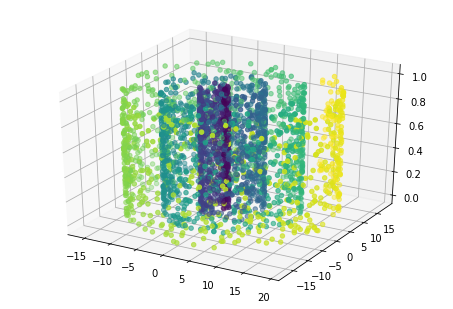

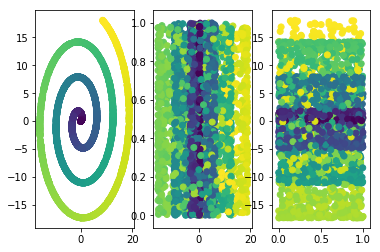

In [5]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=color)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(x, y, c=color)
ax[1].scatter(x, z, c=color)
ax[2].scatter(z, y, c=color)
plt.show()

In [6]:
"""tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]
tmp=pd.DataFrame(tmp)
tmp.shape

print(tmp.iloc[:,0].values)"""

'tmp=[1 ,2 ,3,4, 5, 6,7, 8, 9]\ntmp=pd.DataFrame(tmp)\ntmp.shape\n\nprint(tmp.iloc[:,0].values)'

# Q1.2-Face Dataset
### section1+2

(4096, 698)


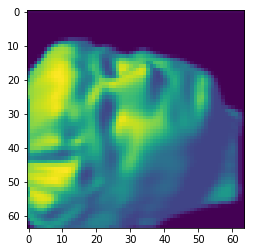

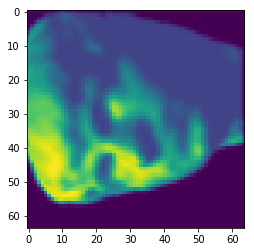

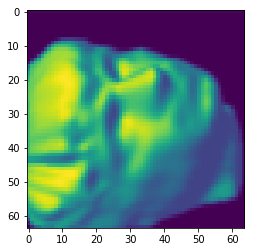

In [7]:

data = sio.loadmat('./face_data.mat')
images = data['images']
print(np.shape(images))
facesData =pd.DataFrame(images.T)
faces_labels = pd.DataFrame(data['poses'].T,columns=['poseX', 'poseY'])
faces_labels['lights']=data['lights'].T
faces_labels_scale =pd.DataFrame(sklearn.preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(faces_labels),columns=[faces_labels.columns])
faces_rgb_color = matplotlib.colors.hsv_to_rgb(faces_labels_scale)

# section2
def plot3images(pd_data,size): 
    plt.imshow(pd_data.iloc[0,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[1,:].values.reshape((size,size)))
    plt.show()
    plt.imshow(pd_data.iloc[2,:].values.reshape((size,size)))
    plt.show()

plot3images(facesData,64)

### section4-
### Each point is an image such that it has dimension of D=4096 and the whole (filtered)dataset contains N=698 images.


# Q1.3-MNIST Dataset
### section1

In [8]:

import pickle , gzip
import numpy as np
f = gzip.open( './mnist.pkl.gz' , 'rb' )
train_set , valid_set , test_set =pickle . load(f,encoding='latin1')
f.close
train_set_images =train_set[0]
train_set_images=train_set_images.T
train_set_digit_number =train_set[1]
np.shape(train_set_images)
data =pd.DataFrame(train_set_images.T)
label = pd.Series(train_set_digit_number.T)

In [9]:
filtered_data=data[label>6]
filtered_data.shape

(15005, 784)

# section2

In [10]:

filtered_data.iloc[5,:].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 29, dtype: float32

# section3

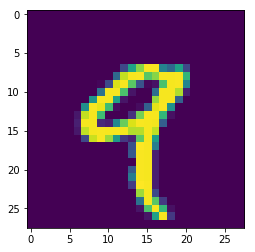

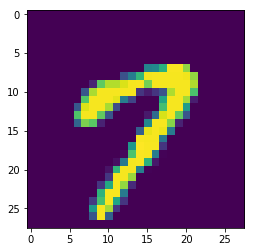

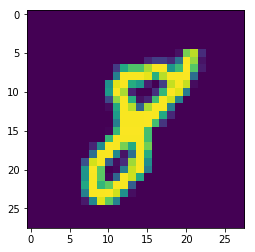

In [11]:

plot3images(filtered_data,28)

# section4
## Each point is an image such that it has dimension of D=783 and the whole (filtered)dataset contains N=15005 images.

# question 2

In [12]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [13]:
data = pd.DataFrame(data)

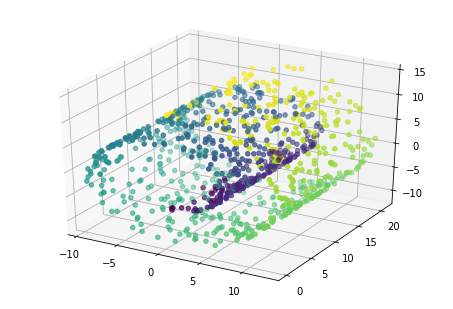

In [14]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [15]:
#question 2.1.1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))


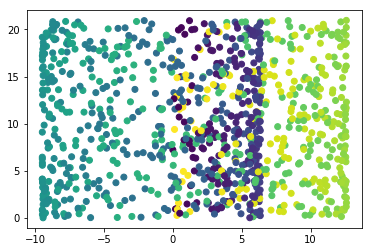

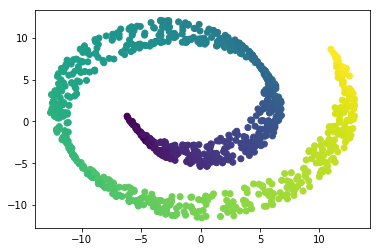

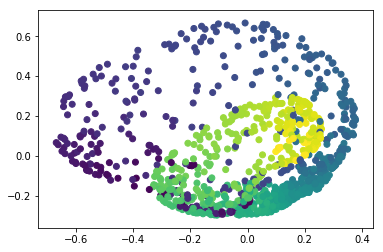

In [16]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()

we after iterating diferent gamma values $\gamma = \frac{1}{2*\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

## question 2.1.1
- 3

In [17]:
# The idea is to unfold the data knowing how the data is build 
# 
data2= data.copy()
data2['arctan']= np.arctan(data[0]/data[2])*100
data2['big_zed']= data[1]*100

C:\Users\amoscoso\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


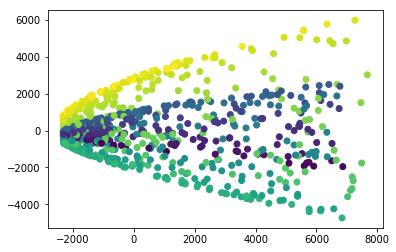

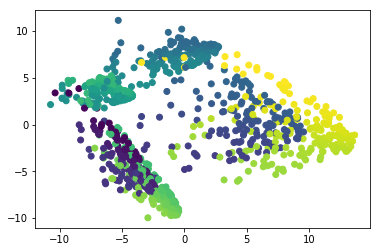

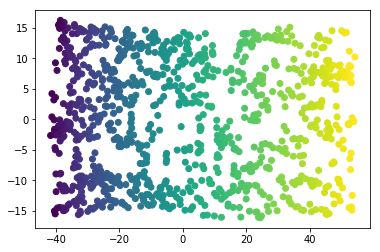

In [18]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 


# polinom try 
poli = data.copy()
# We use a polinom of order 3 which will yield us 20 new features we did include the original ones .... 
pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)

# We also use a log transformacion over the polinomial (trail and error ) it didn't yield better results 
transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)

#PCA descomposition of the data after add the fetures 
c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
plt.scatter(c[0],c[1],c=label)
plt.show()
plt.scatter(d[0],d[1],c=label)
plt.show()

#we also cheat with the ideas and did a Isomo unfold of the data set and then run a pca
# by doing this we found the best results
a= data.copy()
cheat_iso = manifold.Isomap(n_components=3,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
a[5]=cheat_iso.T[2]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

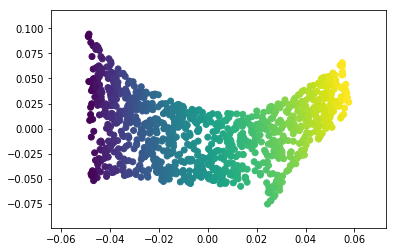

In [19]:
#Question 2.1.2
# LLE and Isomap

lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=12).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

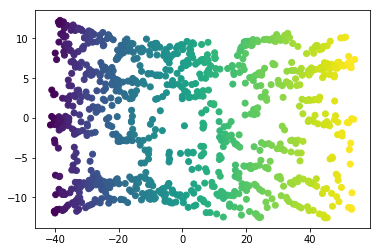

In [20]:
iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(iso[0],iso[1],c=label)
plt.show()

### Question 2.1.3 - 1
- We will write a funtion that choose to randon points  

In [51]:
# section 1 - choose two nearest neighbors- 
def find_distances(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 2).fit(data_reduce)
    distances, labels = nbrs.kneighbors(data_reduce)
    index = pd.DataFrame(labels).sample(n=1)
    two_points_original = data.iloc[index.values[0],:]
    two_points_PR = data_reduce.iloc[index.values[0],:]
    
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')


find_distances(data, pr_dict['pca'])   
find_distances(data,pr_dict['kpca'])
find_distances(data,pd.DataFrame(iso))
find_distances(data,pd.DataFrame(lle))


The original distance is 13.091035972854561, the distance in the paramer reduction is 12.790677372044518
The original distance is 9.989507333936647, the distance in the paramer reduction is 0.8387380629916599
The original distance is 22.853335529592684, the distance in the paramer reduction is 919.3001816471527
The original distance is 22.853335529592684, the distance in the paramer reduction is 1.414213562373095


In [55]:
# section 2 - choose two points that are not in each other's 40'th nearest neighbors-
def find_distance_40(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
    distances, labels = nbrs.kneighbors(data)
    pd.DataFrame(labels).head()
    tmp=pd.DataFrame(labels)
    while(True):
        pair = np.reshape(tmp.sample(n=1).values,-1)
        pair = [pair[0],pair[-1]]
        if pair[0] not in tmp.loc[pair[1],:]:
            break 
    two_points_original = data.iloc[pair,:]
    two_points_PR = data_reduce.iloc[pair,:]
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')
    

In [23]:
find_distance_40(data, pr_dict['pca'])   
find_distance_40(data,pr_dict['kpca'])
find_distance_40(data,pd.DataFrame(iso).T)
find_distance_40(data,pd.DataFrame(lle).T)

The original distance is 14.445787896540429, the distance in the paramer reduction is 14.57078816792143
The original distance is 17.217323632611713, the distance in the paramer reduction is 0.5647795191086974
The original distance is 17.322823691237232, the distance in the paramer reduction is 58.123822596567926
The original distance is 29.28701699715937, the distance in the paramer reduction is 0.08731705485136314


# section 3 - choose two points that are not in each other's 40'th nearest neighbors-


In [24]:
def find_12(data, data_reduce):
    nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]
    for dataIdx in data.index:
        high=labels_high[dataIdx,:]
        low=labels_low[dataIdx,:]
        k_nn_not_12=np.intersect1d(high,low)
        # assumed that the meaning was to exclude from the 12NN in low-dimension, those who was also included in high-dimension-
        low=np.delete(low,k_nn_not_12)
        c.append(data_reduce.loc[low,:])
        # assuming that the meaning of |c(i)| == number of data points in the group c(i)
    print(f' mean of all c = {np.mean(([len(x) for x in c]))}')
    return c
#displaying mean value of c-
c=dict()
c['pca']=find_12(data, pr_dict['pca']) 
c['kpca']=find_12(data,pr_dict['kpca'])
c['iso']=find_12(data,pd.DataFrame(iso).T)
c['lle']=find_12(data,pd.DataFrame(lle).T)

C:\Users\amoscoso\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.94
 mean of all c = 11.936
 mean of all c = 11.881
 mean of all c = 11.907


In [25]:
c['pca'][1]

,0,1
1,1.095238,10.921543
673,1.333745,10.603421
882,0.708705,11.071616
366,1.439071,10.667854
21,1.356721,10.519644
144,0.576737,10.684431
120,0.935832,10.074149
976,-0.042614,10.842781
22,2.082535,10.328862
189,1.747748,9.958470


In [26]:
# section 3 - calculate the mean MDS measure of distances -
def mean_MDS(data,data_reduce):
    """nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]"""
    c=find_12(data, data_reduce) 
    mds=[] 
    for num, c_i in enumerate(c):
        x_i=data.loc[num,:]
        y_i=data_reduce.loc[num,:]
        sum_i=0
        for dataIdx in c_i.index:
            x=data.loc[dataIdx,:]
            y=data_reduce.loc[dataIdx,:]
            high_dist = np.linalg.norm([x,x_i])
            low_dist = np.linalg.norm([y,y_i])
            inner_argument=np.square(high_dist-low_dist)
            sum_i=sum_i+inner_argument
        mds.append(sum_i/len(c_i))
    print(f' mean of all mds = {np.mean(mds)}')
    return mds

#displaying mean value of mds-
mds=dict()
mds['pca']= mean_MDS(data, pr_dict['pca']) 
mds['kpca']=mean_MDS(data,pr_dict['kpca'])
mds['iso']= mean_MDS(data,pd.DataFrame(iso).T)
mds['lle']= mean_MDS(data,pd.DataFrame(lle).T)

#for point=3 for example-


C:\Users\amoscoso\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.94
 mean of all mds = 96.1420894487505
 mean of all c = 11.936
 mean of all mds = 465.68518188878915
 mean of all c = 11.881
 mean of all mds = 617.8434986034553
 mean of all c = 11.907
 mean of all mds = 474.6718725894967


In [27]:

nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
distances, labels = nbrs.kneighbors(data)
pd.DataFrame(labels).head()
tmp=pd.DataFrame(labels)
while(True):
    pair = np.reshape(tmp.sample(n=1).values,-1)
    pair = [pair[0],pair[-1]]
    if pair[0] not in tmp.loc[pair[1],:]:
        break 


# 2.2 Face Dataset
### 2.2.1 PCA Based Methods + 2.2.2 Manifold Based Methods + 
###    2.2.3 Euclidean distances in the low-dimensional representation

In [28]:

def Repeat_sections(data,d,color_label):    
    pr_dict ={}
    data=data#NO NEED IN TRANSPOSE
    pr_dict['extension']= data
    
    # 2.2.1 PCA Based Methods
    pr_dict['pca'] = (decomposition.PCA(n_components=d ,whiten=True).fit_transform(data))
    pr_dict['kpca'] = decomposition.KernelPCA(n_components=d ,kernel='rbf',gamma=0.03).fit_transform(data)
    print('original')
    print(f' shape of faces = {data.shape}')
    plot3images(data,int(math.sqrt(data.shape[1])))
#     print(int(math.sqrt(d)))
    print(f' USing PCA, n_components= {d}')
    projectedFaces=pd.DataFrame(pr_dict['pca'])
#     print(f' shape of projected faces = {projectedFaces.shape}')
#     plot3images(projectedFaces,int(math.sqrt(d)))
    plt.scatter(projectedFaces[0],projectedFaces[1],c=color_label)
    plt.show()
    print(f' USing KPCA, n_components= {d}')
    k_projectedFaces=pd.DataFrame(pr_dict['kpca'])
    print(f' shape of projected faces = {k_projectedFaces.shape}')
#     plot3images(k_projectedFaces,int(math.sqrt(d)))
    plt.scatter(k_projectedFaces[0],k_projectedFaces[1],c=color_label)
    plt.show()
    
    # 2.2.2 Manifold Based Methods
    pr_dict['lle']= manifold.LocallyLinearEmbedding(n_components=d,n_neighbors=7).fit_transform(data)
    print(f' USing LLE, n_components= {d}')
    LLE_projectedFaces=pd.DataFrame(pr_dict['lle'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {LLE_projectedFaces.shape}')
#     plot3images(LLE_projectedFaces,int(math.sqrt(d)))
    plt.scatter(LLE_projectedFaces[0],LLE_projectedFaces[1],c=color_label)
    plt.show()
    
    pr_dict['iso'] = manifold.Isomap(n_components=d,n_neighbors=7).fit_transform(data)
    print(f' USing ISO, n_components= {d}')
    ISO_projectedFaces=pd.DataFrame(pr_dict['iso'])
    print(f' shape of faces = {data.shape}')
    print(f' shape of projected faces = {ISO_projectedFaces.shape}')
#     plot3images(ISO_projectedFaces,int(math.sqrt(d)))
    plt.scatter(ISO_projectedFaces[0],ISO_projectedFaces[1],c=color_label)
    plt.show()
    
    # 2.2.3 Euclidean distances in the low-dimensional representation
    print(f' Euclidean distances Using PCA, n_components= {d}')
    find_distances(data, projectedFaces)
    find_distance_40(data, projectedFaces)
    find_12(data, projectedFaces)
    mean_MDS(data,projectedFaces)
    print(f' Euclidean distances Using KPCA, n_components= {d}')
    find_distances(data, k_projectedFaces)
    find_distance_40(data, k_projectedFaces)
    find_12(data, k_projectedFaces)
    mean_MDS(data,k_projectedFaces)

    print(f' Euclidean distances Using LLE, n_components= {d}')
    find_distances(data, LLE_projectedFaces)
    find_distance_40(data, LLE_projectedFaces)
    find_12(data, LLE_projectedFaces)
    mean_MDS(data,LLE_projectedFaces)
    
    print(f' Euclidean distances Using ISO, n_components= {d}')
    find_distances(data, ISO_projectedFaces)
    find_distance_40(data, ISO_projectedFaces)
    find_12(data, ISO_projectedFaces)
    mean_MDS(data,ISO_projectedFaces)

original
 shape of faces = (698, 4096)


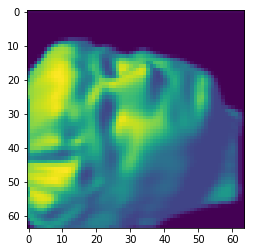

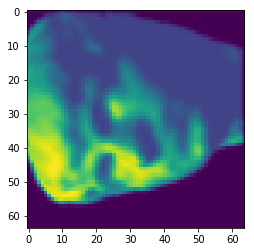

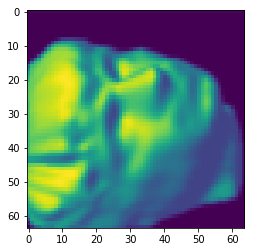

 USing PCA, n_components= 2


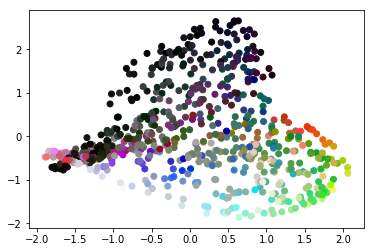

 USing KPCA, n_components= 2
 shape of projected faces = (698, 2)


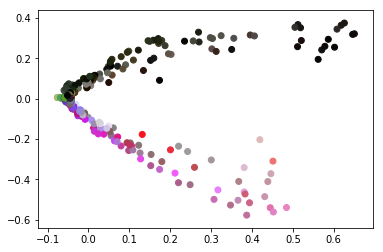

 USing LLE, n_components= 2
 shape of faces = (698, 4096)
 shape of projected faces = (698, 2)


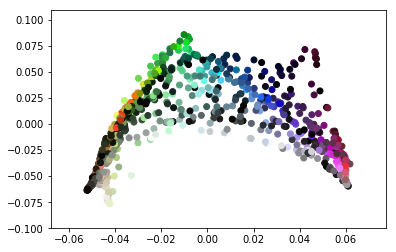

 USing ISO, n_components= 2
 shape of faces = (698, 4096)
 shape of projected faces = (698, 2)


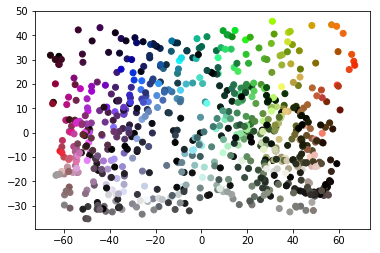

 Euclidean distances Using PCA, n_components= 2
The original distance is 41.29871500617124, the distance in the paramer reduction is 0.6630689358474974
The original distance is 40.662273107946774, the distance in the paramer reduction is 0.9489850596018136


C:\Users\amoscoso\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932664756446991
 mean of all c = 11.932664756446991
 mean of all mds = 1563.3009209513878
 Euclidean distances Using KPCA, n_components= 2
The original distance is 25.606645331476564, the distance in the paramer reduction is 0.453874680759474
The original distance is 32.97480140122299, the distance in the paramer reduction is 0.10602297507837666
 mean of all c = 11.954154727793696
 mean of all c = 11.954154727793696
 mean of all mds = 1735.5370596014877
 Euclidean distances Using LLE, n_components= 2
The original distance is 38.682572478998864, the distance in the paramer reduction is 0.021977243636286673
The original distance is 37.39674112334796, the distance in the paramer reduction is 0.05094289436221155
 mean of all c = 11.939828080229226
 mean of all c = 11.939828080229226
 mean of all mds = 1695.8666775092809
 Euclidean distances Using ISO, n_components= 2
The original distance is 46.79086002040869, the distance in the paramer reduction is 49.61210726119395
T

In [52]:
#now trying the function on Face Dataset
import math

#print(partialfacesData)
Repeat_sections(facesData,2,faces_rgb_color)

original
 shape of faces = (1000, 784)


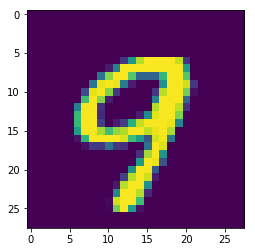

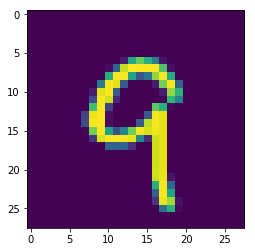

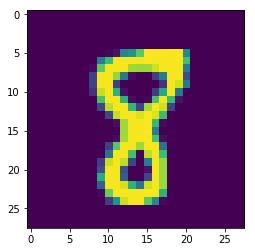

 USing PCA, n_components= 2


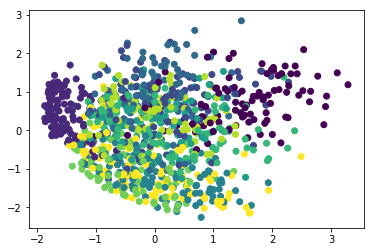

 USing KPCA, n_components= 2
 shape of projected faces = (1000, 2)


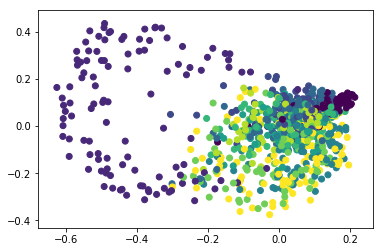

 USing LLE, n_components= 2
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 2)


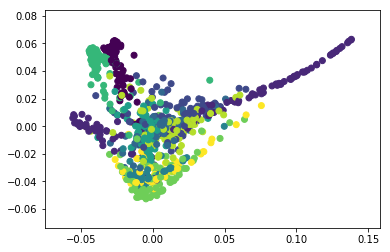

 USing ISO, n_components= 2
 shape of faces = (1000, 784)
 shape of projected faces = (1000, 2)


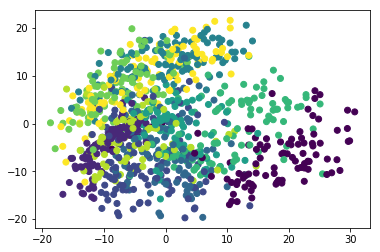

 Euclidean distances Using PCA, n_components= 2
The original distance is 9.13967227935791, the distance in the paramer reduction is 2.069228616196571
The original distance is 11.997398376464844, the distance in the paramer reduction is 2.1061645775463953


C:\Users\amoscoso\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.97
 mean of all c = 11.97
 mean of all mds = 129.6450417973566
 Euclidean distances Using KPCA, n_components= 2
The original distance is 11.013500213623047, the distance in the paramer reduction is 0.06140570342540741
The original distance is 13.425329208374023, the distance in the paramer reduction is 0.42426440119743347
 mean of all c = 11.971
 mean of all c = 11.971
 mean of all mds = 167.81083964620072
 Euclidean distances Using LLE, n_components= 2
The original distance is 11.042325973510742, the distance in the paramer reduction is 0.10287584581493613
The original distance is 9.72811508178711, the distance in the paramer reduction is 0.05808064729907903
 mean of all c = 11.947
 mean of all c = 11.947
 mean of all mds = 173.27699752201596
 Euclidean distances Using ISO, n_components= 2
The original distance is 16.71276092529297, the distance in the paramer reduction is 13.996133554192463
The original distance is 12.49669361114502, the distance in the paramer re

In [73]:
mist_data = pd.DataFrame(train_set[0])
mist_data = mist_data.sample(1000)
mist_label = pd.DataFrame(train_set[1]).loc[mist_data.index,:]/10
mist_data = pd.DataFrame(mist_data.values)

Repeat_sections(mist_data,2,np.reshape(mist_label.values,-1))

In [68]:
# Repeat_sections(mist_data,2,np.reshape(mist_label.values,-1))
# pd.DataFrame(mist_label.values)

In [45]:
color

array([ 0.31053639,  0.54552282,  0.39610486, ...,  0.42047336,
        0.2055901 ,  0.99926758])